## Statistical Learning Theory
Exercises taken from the book Learning from Data by Yaser Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin.

In [3]:
using Random
using DataFrames
using Plots

In [4]:
function flip_coins(total_coins)
    states = zeros(total_coins)
    probs = rand(total_coins)
    head_indices = findall(x -> x>0.5,probs)
    states[head_indices'].= 1
    return states
end

function experiment(total_coins,total_flips)
    # Build a matrix to store every result 
    result_matrix = zeros(total_coins,total_flips)
    
    # Flip all coins repeteadly
    for i=1:total_flips
        # Flip all coins
        states = flip_coins(total_coins)
        # Find indices of heads
        heads_idxs = findall(==(1),states)
        # Update the current column in result matrix
        result_matrix[heads_idxs,i].=1
    end
    
    # Count number of heads in each row (coin)
    num_heads = [ count(==(1),result_matrix[i,:]) for i=1:total_coins ]
    # Find the coin with minimum rate of heads
    _ , c_min = findmin(num_heads)
    # Set a random coin
    c_rand = rand(1:total_coins)
    
    # Calculate the required rates
    v₁ = num_heads[1]/total_flips
    vᵣ = num_heads[c_rand]/total_flips
    vc = num_heads[c_min]/total_flips 
    
    return Array([v₁, vᵣ, vc, c_rand, c_min])
end

experiment (generic function with 1 method)

### Exercise 1.2
Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is  if the message is considered spam.

* Can you think of some keywords that will end up with a large positive weight in the perceptron?
Solución: La elección de las palabras depende del idioma en que se esté trabajando: descuento, ahorro, ganza, aproveche, gratis.
* How about keywords that will get a negative weight?
Solución:  Documento, deseos, trabajo.

* What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?
Solution. The threshold or bias term $b$ is the parameter that affects the most the amount of borderline messages classified as spam, cause it represents the decision boundary $sign((\sum_{i=1}^{d} w_{i}x_i)+b)$.

### Exercise 1.3
The weight update rule in (1.3) has the nice interpretation that it moves in the direcion of classifying  correctly.

  (a) Show that $y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t) <0 $.
  
   Solution. Since $\mathbf{x}(t)$ is missclassified by $\mathbf{w(t)}$ then $\mathbf{w}(t)^T\mathbf{x}(t)$ has the opposite sign of $y(t)\in\{-1,1\}$ (otherwise it will be well classified). Then $y(t)[\mathbf{w}^T(t)\mathbf{x}(t)]<0$
   
   (b) Show that $y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t)>y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)$.
    
   Solution. Note that $y(t)\in\{-1,1\}$ so it is a scalar. By definition of the algorithm, $\mathbf{w}(t+1) = \mathbf{w}(t) + y(t)\mathbf{x}(t)$",
 
 \begin{align*}
y(t)w^T(t+1)x(t) &= y(t) \left(w(t)+y(t)x(t)\right)^Tx(t) \\
&= y(t)\left(w^T(t) + y(t)x^T(t)\right)x(t) \\
&= y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t)\\
&\gt y(t)w^T(t)x(t) \;\;\;\text{because the last term is } \ge \text{ than } 0\\
\end{align*}


   (c) As far as classifying $\mathbf{x}(t)$ is concerned, argue that the move from $\mathbf{w}(t)$ to $\mathbf{w}(t+1)$ is a move 'in the right direction',
   Solution. When $\mathbf{x}(t)$ is  missclassified, the product $y(t)\mathbf{w}(t)^T\mathbf{x}(t)<0$, increasing it means making it closer to be positive or turning it positive, the fact that the product is positive implies $\mathbf{x}$ is correctly classified. As shown in the previous literal, $y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t)>y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)$, i.e, in each iteration we are increasing the product $y\mathbf{w}^T\mathbf{x}$ so $\mathbf{w}$ is moving in the \"right\" direction considering that particular $\mathbf{x}$."

##  1.10
Here is an experiment that illustrates the diference between a single bin and multiple bins. Ruan a computer simulation for flipping 1000 fair coins. Flip each coin independently 10 times. Let's focues on 3 coins as follows:


  $c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had a the minimun frequecy of heads (pick the earlier one in case of a tie). Let $\nu_1$, $\nu_{rand}$ and $\nu_{min}$ be the fraction of heads you obtain for the respective three coins.
*   a) What is $\mu$ for the three coins selected?,
   El $\mu = 0.5$ por que se presume que las monedas son balanceadas. Recordemos que $\mu$ representa la probabilidad de _error_ fuera de la muestra. La cual, en general, es desconocida. A continuación se presentan las frecuencias para las monedas propuestas.

In [5]:
repetitions = 100000
big_experiment = zeros(repetitions,5)

for i=1:repetitions
    big_experiment[i,:]=experiment(1000,10)
end

In [6]:
data = DataFrame(big_experiment, [:v₁,:vᵣ,:vc,:c_rand,:c_min])
first(data,10)

,v₁,vᵣ,vc,c_rand,c_min
,Float64,Float64,Float64,Float64,Float64
1,0.4,0.4,0.0,216.0,33.0
2,0.4,0.9,0.1,675.0,93.0
3,0.5,0.7,0.0,473.0,469.0
4,0.5,0.5,0.0,142.0,335.0
5,0.3,0.4,0.0,284.0,501.0
6,0.5,0.3,0.0,437.0,104.0
7,0.7,0.8,0.0,103.0,541.0
8,0.5,0.8,0.0,365.0,616.0
9,0.6,0.7,0.0,868.0,521.0



Se puede ver los distintos valores que toman las últimas 2 columnas sobre todas la repeticiones

In [ ]:
# Pkg.add("StatsPlots")
using StatsPlots # Required for the DataFrame user recipe
# Now let's create the DataFrame
using DataFrames
using MultivariateStats
df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))
# Plot the DataFrame by declaring the points by the column names
@df df plot!(:a, [:b :c]) # x = :a, y = [:b :c]. Notice this is two columns!

In [ ]:
p1=histogram(data[:,:v₁], title="ν₁ distribution", bins=20)
p2=histogram(data[:,:vᵣ], title="νᵣ distribution", bins=20)
p3=histogram(data[:,:vc], title="νc distribution", bins=20)

@data data plot!(p1,p2,p3, layout=(3,1), size=(800,800))

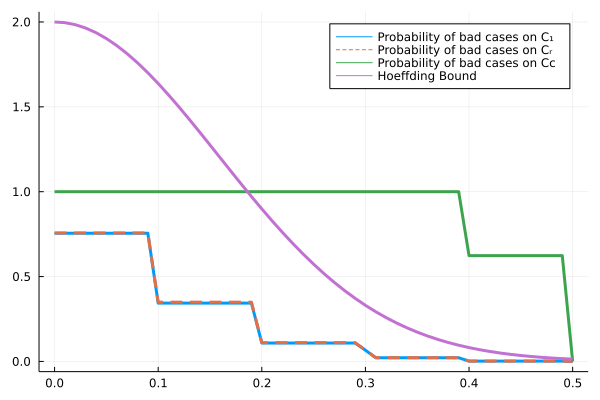

In [12]:
# Fixed μ
μ = 0.5

# Epsilon range values
ϵ_range = 0:0.01:0.5

# Hoeffding Bound
hoeff = 2*exp.(-2*10*ϵ_range.^2)

# Calculate probabilities with fixed epsilon
p₁,pᵣ,pc = [],[],[]
for ϵ in ϵ_range
    # Calculate the probability for each coin of interest
    for (v,p) in zip([:v₁,:vᵣ,:vc],[p₁,pᵣ,pc])
        # Count the bas cases
        badCases = findall(x->abs(x-μ)>ϵ, data[:,v])
        # The sum of bad cases over all cases is interpreted as a probability, due to the large number of reptitions
        # Save that probability
        push!(p, length(badCases)/repetitions)
    end
end

plot(ϵ_range,p₁, label="Probability of bad cases on C₁ ", lw=3)
plot!(ϵ_range,pᵣ,label="Probability of bad cases on Cᵣ", lw=3, ls=:dash)
plot!(ϵ_range,pc, label="Probability of bad cases on Cc", lw=3)

plot!(ϵ_range,hoeff, label="Hoeffding Bound", lw=3)

## Punto 12

A friend comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has 4000 data points. She is willing to pay you to solve her porblem and produce for her a $g$ which aproximates $f$. What is the best that you can promise her among the following:
* (c)La función objetivo puede ser muy compleja de aprender por completo.çç

* Como se tienen un conjunto de datos grande, la probabilidad de alcanzar la desigualdad de Hoeffding y el error puede ser pequeño dada la cantidad de datos